In [1]:
from PIL import Image
import requests
import ruclip
import numpy as np
import torch
import base64
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


In [2]:
device="cuda"
clip, processor = ruclip.load("ruclip-vit-large-patch14-336", device=device)
clip.to(device)

"---"

C:\Users\Sergey\.conda\envs\edok\Lib\site-packages\huggingface_hub\utils\_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)
C:\Users\Sergey\.conda\envs\edok\Lib\site-packages\huggingface_hub\file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
C:\Users\Sergey\.conda\envs\edok\Lib\site-packages\ruclip\model.py:237: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for 

'---'

C:\Users\Sergey\.conda\envs\edok\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
8it [00:00, 14.86it/s]


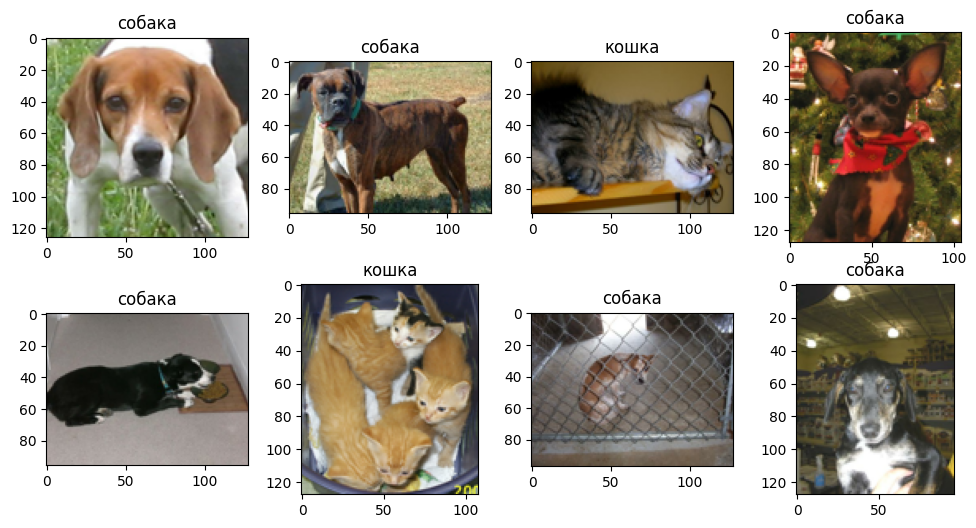

In [3]:
#Классификация 


# prepare images
bs4_urls = requests.get('https://raw.githubusercontent.com/ai-forever/ru-dolph/master/pics/pipelines/cats_vs_dogs_bs4.json').json()
images = [Image.open(BytesIO(base64.b64decode(bs4_url))) for bs4_url in bs4_urls]

# prepare classes
classes = ['кошка', 'собака']
templates = ['{}', 'это {}', 'на картинке {}', 'это {}, домашнее животное']

# predict
predictor = ruclip.Predictor(clip, processor, device, bs=8, templates=templates)
with torch.no_grad():
    text_latents = predictor.get_text_latents(classes)
    pred_labels = predictor.run(images, text_latents)

# show results
f, ax = plt.subplots(2,4, figsize=(12,6))
for i, (pil_img, pred_label) in enumerate(zip(images, pred_labels)):
    ax[i//4, i%4].imshow(pil_img)
    ax[i//4, i%4].set_title(classes[pred_label])

In [4]:
#Получение вектора по тексту
clip.to(device)

# Пример текста
texts = ["кошка", "собака", "это кошка", "на картинке собака"]

# Токенизация текста с использованием ruclip
tokenized_texts = processor(texts, return_tensors="pt", padding=True)

# Перемещение каждого тензора на нужное устройство
for key in tokenized_texts:
    tokenized_texts[key] = tokenized_texts[key].to(device)

# Получение эмбеддингов текстов
with torch.no_grad():
    text_embeddings = clip.encode_text(tokenized_texts['input_ids'])

# Вывод размерности эмбеддингов
print(text_embeddings.shape)
text_embeddings

torch.Size([4, 768])


tensor([[ 3.6861e-02, -6.6666e-02, -5.5202e-02,  ...,  8.3571e-03,
         -1.1083e-02, -1.3994e-02],
        [-2.8084e-02, -2.8442e-02, -2.5720e-02,  ..., -5.9311e-03,
         -6.5248e-02,  2.7233e-02],
        [ 3.2174e-02, -5.1033e-02, -5.2430e-02,  ...,  3.6187e-02,
         -8.7979e-03, -4.0928e-03],
        [ 9.0150e-03,  2.4370e-02,  8.2474e-05,  ..., -9.5851e-03,
         -4.8857e-02,  4.4757e-02]], device='cuda:0')

In [3]:
import chromadb
from chromadb.config import Settings
import os
# Инициализация клиента с указанием пути к существующей базе данных
client = chromadb.PersistentClient(path=".")


In [4]:
collection = client.get_or_create_collection("frame_embeddings")

# Получение всех элементов из коллекции
elements = collection.get()
print(elements)

{'ids': ['034f27f0-a5b3-472a-8ccd-41277b843244', '07f11bb1-d353-4f33-b6fd-8ae88828f9bf', '09259af0-a099-4e1d-a7e2-849901fff218', '0b987304-25bb-44e4-b9e5-abf1adf0c783', '0cd49a77-b603-4ed8-af45-6225853ca319', '0cfa7def-3b48-4ff1-973c-22952bfd3c92', '0e231cf1-b094-4625-af53-28a6fb34357b', '0e260b66-f878-45c6-b2aa-ec20f2663ca6', '0e3b58d5-e051-49a7-8fe7-7b3c55a9d75d', '0e6a0d6e-057a-4a66-8e88-5c777315c1d7', '0ea5c0ca-ad75-44a1-9a5a-207977157b75', '0eab0656-a9a3-4b97-9061-728ca88d1e59', '0f144296-c6ff-4a85-9f9b-d65d7254ccf5', '10cc8277-faeb-4f5d-ab39-9a106492fd41', '14c58963-d072-4b7b-a265-227065ae1085', '175ecf52-24d4-4c87-9770-7d93fb8a6d4c', '1961cc22-d174-4c6e-b6eb-a96156a69361', '1aa7a103-084e-46eb-bf5f-93c3eff81333', '1aafd69d-ba5f-40b5-bac0-5591c8f4b82f', '1c34bf8c-dc1c-46c2-bd4d-8907e6f3411e', '214be764-0a67-4f32-812b-0f345e29e19c', '230f1ca6-5c5d-4e8d-88f4-a5944d256bcb', '23670444-d662-41ac-98f3-137b896db0fd', '236748da-8306-47b7-8153-b3aff30d0179', '236a60eb-e1e7-45e9-aa3a-16a9ce

In [72]:
#Наполнение БД

# Создание/Подключение к существующей коллекции (если она уже была создана)
collection = client.get_or_create_collection("frame_embeddings")

frames_dir = "frames"
# Обрабатываем изображения в папке frames
for file_name in os.listdir(frames_dir):
    if file_name.endswith((".png", ".jpg", ".jpeg")):  # Работать только с изображениями
        image_id = os.path.splitext(file_name)[0]  # Убираем расширение для id
        image_path = os.path.join(frames_dir, file_name)
        
        # Проверяем, есть ли запись с таким id в базе данных
        existing_record = collection.get(ids=[image_id])
        if len(existing_record['ids']) > 0:
            print(f"Запись с id {image_id} уже существует в базе данных. Пропускаем...")
            continue  # Пропускаем, если запись уже есть
        
        # Открываем изображение
        image = Image.open(image_path)
        
        # Подготовьте изображение для модели
        inputs = processor(images=[image], return_tensors="pt")
        
        # Перенесите тензоры на устройство
        pixel_values = inputs["pixel_values"].to("cuda")  # Используйте "cuda", если есть GPU
        
        # Создайте эмбеддинг изображения
        with torch.no_grad():
            image_embedding = clip.encode_image(pixel_values)

        # Преобразование в numpy для дальнейшего использования
        image_embedding = image_embedding.cpu().numpy()[0]
        
        # Нормализуйте эмбеддинг с использованием numpy
        image_embedding = image_embedding / np.linalg.norm(image_embedding)

        # Преобразуйте numpy.ndarray в список
        image_embedding = image_embedding.tolist()
        
        # Добавляем эмбеддинг в базу данных
        collection.add(
            embeddings=[image_embedding],  # Эмбеддинг изображения
            metadatas=[{"file_name": file_name}],  # Дополнительные данные
            ids=[image_id]  # Идентификатор (имя файла без расширения)
        )
        print(f"Эмбеддинг для {image_id} успешно добавлен в базу данных.")


# Сохранение изменений
#client.persist()
print("Все эмбеддинги сохранены и база данных обновлена.")

Запись с id 034f27f0-a5b3-472a-8ccd-41277b843244 уже существует в базе данных. Пропускаем...
Запись с id 07f11bb1-d353-4f33-b6fd-8ae88828f9bf уже существует в базе данных. Пропускаем...
Запись с id 09259af0-a099-4e1d-a7e2-849901fff218 уже существует в базе данных. Пропускаем...
Запись с id 0b987304-25bb-44e4-b9e5-abf1adf0c783 уже существует в базе данных. Пропускаем...
Запись с id 0cd49a77-b603-4ed8-af45-6225853ca319 уже существует в базе данных. Пропускаем...
Запись с id 0cfa7def-3b48-4ff1-973c-22952bfd3c92 уже существует в базе данных. Пропускаем...
Запись с id 0e231cf1-b094-4625-af53-28a6fb34357b уже существует в базе данных. Пропускаем...
Запись с id 0e260b66-f878-45c6-b2aa-ec20f2663ca6 уже существует в базе данных. Пропускаем...
Запись с id 0e3b58d5-e051-49a7-8fe7-7b3c55a9d75d уже существует в базе данных. Пропускаем...
Запись с id 0e6a0d6e-057a-4a66-8e88-5c777315c1d7 уже существует в базе данных. Пропускаем...
Запись с id 0ea5c0ca-ad75-44a1-9a5a-207977157b75 уже существует в базе

In [5]:
# Открываем изображение
image_file = Image.open("chicken.jpg")

def search_image(image, collection, top_k=5):
    # Подготовьте изображение для модели
    inputs = processor(images=[image], return_tensors="pt")
    
    # Перенесите тензоры на устройство
    pixel_values = inputs["pixel_values"].to("cuda")  # Используйте "cuda", если есть GPU
    
    # Создайте эмбеддинг изображения
    with torch.no_grad():
        image_embedding = clip.encode_image(pixel_values)

    # Преобразование в numpy для дальнейшего использования
    image_embedding = image_embedding.cpu().numpy()[0]
    
    # Нормализуйте эмбеддинг с использованием numpy
    image_embedding = image_embedding / np.linalg.norm(image_embedding)

    # Преобразуйте numpy.ndarray в список
    image_embedding = image_embedding.tolist()

    # Выполняем поиск по базе данных
    results = collection.query(
        query_embeddings=[image_embedding],  # Эмбеддинг для поиска
        n_results=top_k  # Количество результатов, которое вы хотите получить (топ K)
    )
    
    return results

search_image(image_file, collection)


C:\Users\Sergey\.conda\envs\edok\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


{'ids': [['e7ae7b8f-2b00-48a1-8b05-e95c29927d3f',
   '034f27f0-a5b3-472a-8ccd-41277b843244',
   '77964ec0-3045-4b39-8c11-83214525de6f',
   '0cfa7def-3b48-4ff1-973c-22952bfd3c92',
   '824a02c6-0b17-43d5-86b6-1058f053139b']],
 'distances': [[0.6864079919916651,
   0.7507078647613525,
   0.7684054970741272,
   0.777903139591217,
   0.781370997428894]],
 'metadatas': [[{'file_name': 'e7ae7b8f-2b00-48a1-8b05-e95c29927d3f.png'},
   {'file_name': '034f27f0-a5b3-472a-8ccd-41277b843244.png'},
   {'file_name': '77964ec0-3045-4b39-8c11-83214525de6f.png'},
   {'file_name': '0cfa7def-3b48-4ff1-973c-22952bfd3c92.png'},
   {'file_name': '824a02c6-0b17-43d5-86b6-1058f053139b.png'}]],
 'embeddings': None,
 'documents': [[None, None, None, None, None]],
 'uris': None,
 'data': None}

In [6]:
def search_text(text, collection, top_k=5):
    # Токенизация текста с использованием ruclip
    tokenized_text = processor(text, return_tensors="pt", padding=True)

    # Перемещение каждого тензора на нужное устройство
    tokenized_text = {key: value.to(device) for key, value in tokenized_text.items()}

    # Получение эмбеддингов текста
    with torch.no_grad():
        text_embedding = clip.encode_text(tokenized_text['input_ids'])

    # Преобразование в numpy для дальнейшего использования
    text_embedding = text_embedding.cpu().numpy()[0]
    
    # Нормализация эмбеддинга с использованием numpy
    text_embedding = text_embedding / np.linalg.norm(text_embedding)

    # Преобразование numpy.ndarray в список
    text_embedding = text_embedding.tolist()

    # Поиск по коллекции
    results = collection.query(
        query_embeddings=[text_embedding],  # Эмбеддинг для поиска
        n_results=top_k  # Количество результатов, которое вы хотите получить (топ K)
    )

    return results

# Пример вызова функции
search_text('курица', collection)


{'ids': [['bd6f307d-a34f-44ca-adb1-279c80915a28',
   'abb8c70f-93ac-4db1-a90a-8f6f10f9377f',
   'ed93c1fd-4874-4bcd-bd12-2d3ad997f46d',
   'f9e9c7a5-56c1-418b-a109-efef6f1c3e9e',
   '9335da68-adbd-447d-a6ba-6aa78a196989']],
 'distances': [[1.1616811781702485,
   1.16512279302741,
   1.1689128803849766,
   1.1709761998436352,
   1.1783523091529648]],
 'metadatas': [[{'file_name': 'bd6f307d-a34f-44ca-adb1-279c80915a28.png'},
   {'file_name': 'abb8c70f-93ac-4db1-a90a-8f6f10f9377f.png'},
   {'file_name': 'ed93c1fd-4874-4bcd-bd12-2d3ad997f46d.png'},
   {'file_name': 'f9e9c7a5-56c1-418b-a109-efef6f1c3e9e.png'},
   {'file_name': '9335da68-adbd-447d-a6ba-6aa78a196989.png'}]],
 'embeddings': None,
 'documents': [[None, None, None, None, None]],
 'uris': None,
 'data': None}

In [7]:
def search_context(text, collection, top_k=5):
    # Токенизация текста с использованием ruclip
    tokenized_text = processor(text, return_tensors="pt", padding=True)

    # Перемещение каждого тензора на нужное устройство
    tokenized_text = {key: value.to(device) for key, value in tokenized_text.items()}

    # Получение эмбеддингов текста
    with torch.no_grad():
        text_embedding = clip.encode_text(tokenized_text['input_ids'])

    # Преобразование в numpy для дальнейшего использования
    text_embedding = text_embedding.cpu().numpy()[0]
    
    # Нормализация эмбеддинга с использованием numpy
    text_embedding = text_embedding / np.linalg.norm(text_embedding)

    # Преобразование numpy.ndarray в список
    text_embedding = text_embedding.tolist()

    # Поиск по коллекции
    results = collection.query(
        query_embeddings=[text_embedding],  # Эмбеддинг для поиска
        n_results=top_k  # Количество результатов, которое вы хотите получить (топ K)
    )

    return results

# Пример вызова функции
search_text('курица курица курица', collection)

{'ids': [['bd6f307d-a34f-44ca-adb1-279c80915a28',
   'abb8c70f-93ac-4db1-a90a-8f6f10f9377f',
   '034f27f0-a5b3-472a-8ccd-41277b843244',
   'e737af6b-0dc6-44a5-96e8-326c73c996bb',
   '77964ec0-3045-4b39-8c11-83214525de6f']],
 'distances': [[1.234336609520451,
   1.2458384994161258,
   1.2564328908920288,
   1.2655454041552132,
   1.2689839601516724]],
 'metadatas': [[{'file_name': 'bd6f307d-a34f-44ca-adb1-279c80915a28.png'},
   {'file_name': 'abb8c70f-93ac-4db1-a90a-8f6f10f9377f.png'},
   {'file_name': '034f27f0-a5b3-472a-8ccd-41277b843244.png'},
   {'file_name': 'e737af6b-0dc6-44a5-96e8-326c73c996bb.png'},
   {'file_name': '77964ec0-3045-4b39-8c11-83214525de6f.png'}]],
 'embeddings': None,
 'documents': [[None, None, None, None, None]],
 'uris': None,
 'data': None}